In [3]:
import numpy , random , math
from scipy.optimize import minimize 
import matplotlib.pyplot as plt
import numpy as np

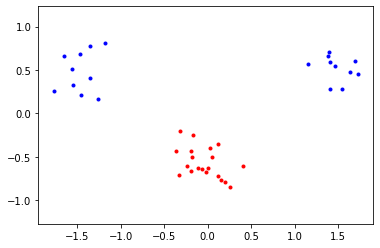

In [56]:
np.random.seed(100)
classA = np.concatenate (
(np.random.randn (10 , 2) * 0.2 + [ 1.5 , 0.5 ] ,
np.random.randn (10 , 2) * 0.2 + [ -1.5 , 0.5 ] ) )
classB = np.random.randn (20 , 2) * 0.2 + [ 0.0 , -0.5]
inputs = np.concatenate((classA, classB))
onesA = np.ones(classA.shape[0])
onesB = -np.ones(classB.shape[0])
targets = np.concatenate((onesA, onesB))
N = inputs.shape[0]
permute = list(range(N))
np.random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]
plt.plot((list(p[0] for p in classA)), list((p[1] for p in classA)), 'b.')
plt.plot((list(p[0] for p in classB)), list((p[1] for p in classB)), 'r.')
plt.axis('equal')
plt.savefig('svmplot.pdf')
plt.show()

In [5]:
start = numpy.zeros(N) # vector with the initial guess of the α⃗ vector

In [6]:
#Linear kernel
def LinearKernel(x, y):
    return np.dot(x, y)

Kernel = LinearKernel

In [7]:
Pmatrix = numpy.zeros((N,N))
for i in range(N):
    for j in range(N):
        Pmatrix[i][j] = targets[i]*targets[j]*Kernel(inputs[i], inputs[j])

In [8]:
Pmatrix

array([[ 2.51356598, -0.27214682,  2.32667058, ..., -2.42999649,
        -0.18444192, -2.09809971],
       [-0.27214682,  0.6094552 , -0.32629075, ...,  0.98217895,
         0.23369359,  0.65787428],
       [ 2.32667058, -0.32629075,  2.16321031, ..., -2.34153153,
        -0.19813628, -1.99733157],
       ...,
       [-2.42999649,  0.98217895, -2.34153153, ...,  3.2407327 ,
         0.44328794,  2.56234513],
       [-0.18444192,  0.23369359, -0.19813628, ...,  0.44328794,
         0.09229048,  0.3126707 ],
       [-2.09809971,  0.65787428, -1.99733157, ...,  2.56234513,
         0.3126707 ,  2.07115892]])

In [9]:
C = 100 # random value

In [10]:
#B = [(0, None) for b in range(N)] # version with no upper bound

In [11]:
B = [(0, C) for b in range(N)] # bounds for alpha

In [12]:
def zerofun(alpha):
    return np.dot(alpha, targets)

In [13]:
XC = {'type':'eq', 'fun':zerofun}

In [14]:
def objective(alpha):
            
    return (1/2)*np.dot(alpha, np.dot(alpha, Pmatrix)) - np.sum(alpha)

# np.dot between two 1D vectors computes a simple dot product (multiply each row with the other corresponding row and eventually summing for all rows)

In [15]:
ret = minimize(objective, start, bounds=B, constraints=XC)
alpha = ret['x']

In [16]:
alpha

array([5.85092055e-14, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.42336315e-14, 7.57903525e-14, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.20410272e+01, 0.00000000e+00,
       7.63418947e-14, 7.36682358e-16, 0.00000000e+00, 1.15539220e-15,
       0.00000000e+00, 7.89021706e+00, 0.00000000e+00, 0.00000000e+00,
       7.98521944e-14, 4.19833963e-14, 5.72810493e-15, 1.74486622e-14,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.58483188e-15, 9.07540445e-14, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.15081014e+00])

In [17]:
if ret.success:
    print("Success!")
else:
    print("The optimization didnt converge!")

Success!


In [18]:
# Remove 0's
non_zero_values = []
for i in range(len(alpha)):
    if alpha[i] > 10**(-5):
        non_zero_values.append((alpha[i], inputs[i], targets[i]))

In [19]:
non_zero_values

[(12.04102720046145, array([-0.3227157 , -0.20585723]), -1.0),
 (7.890217062966618, array([-1.26207555,  0.16187663]), 1.0),
 (4.150810137494726, array([1.41237288, 0.27633635]), 1.0)]

In [43]:
# Higher value of α means that ith training example holds more importance as a support vector
def compute_b():
    # the indicator function for any support vector has a value equal to its target value, 
    # since we know that it is exactly on the margin
    for alpha, x, target in non_zero_values:
        if alpha < C:
            support_v = x
            target_support_v = target
    
    b_result = 0
    # only want points on the margin (corresponds to a point with an α-value larger than zero, but less than C)
    for alpha, x, target in non_zero_values:
        b_result += alpha*target*Kernel(support_v, x)
    
    return b_result - target_support_v

In [45]:
b = compute_b()

In [54]:
def indicator(point):
    indic_sum = 0
    for alpha, x, target in non_zero_values:
        indic_sum += alpha*target*Kernel(point, x)
    return indic_sum - b

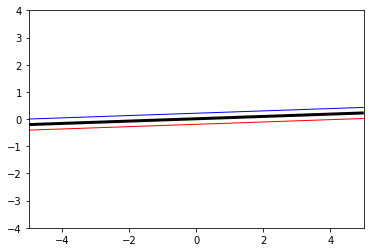

In [58]:
xgrid = np.linspace(-5,5) 
ygrid = np.linspace(-4,4)

grid = np.array([[indicator(np.array((x, y))) for x in xgrid] for y in ygrid])
plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1, 3, 1))
plt.show()

In [62]:
def plot(classA, classB):
    plt.plot( [ p[0] for p in classA], [ p[1] for p in classA], 'b. ' )
    plt.plot( [ p[0] for p in classB], [ p[1] for p in classB], 'r. ' )

    xgrid = np.linspace(-5, 5)
    ygrid = np.linspace(-4, 4)
    grid = np.array([[indicator(np.array((x,y)))
                        for x in xgrid]
                        for y in ygrid])

    plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0),
                colors = ("red", "black", "blue"),
                linewidths = (1, 3, 1))

    plt.axis('equal')           # Force same scale on both axes
    plt.savefig('svmplot.png')  # Save a copy in a file
    plt .show()             

In [63]:
classA = np.concatenate((\
            # np.random.randn(20, 2) * 0.2 + [-2.0, 0.0],\
            np.random.randn(20, 2) * 0.2 + [0.0, 2.0],\
            np.random.randn(20, 2) * 0.2 + [2.0, 0.0]))
classB = np.random.randn(20, 2) * 0.2 + [0.0, 0.0]

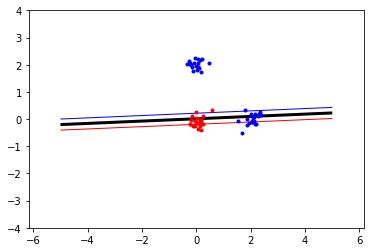

In [64]:
plot(classA, classB)